In [1]:
from numpy.testing import assert_, assert_equal, assert_approx_equal, assert_raises, assert_allclose
import numpy as np #import numpy as usual
from numpy import linalg as LA #import linear algebra package for norms, etc.
import matplotlib.pyplot as plt #import plotting package

##### ME 574 Spring 2021

# Homework 1

1. The 2 code cells below contain a slight modification of code from "python_logistic_map.ipynb". The modifications include a couple name changes, and the `steadyArray` function is modified to work with different mapping functions. (The name of the function, e.g. `logistic`, appears as the first argument.)

Use the code to create plots from which you can read off the parameter values for the first few branching points in the bifurcation diagram of the iterated logistic map. You will likely need to modify the range of values for both the variable and the parameter to "zoom in" in order to get a good look at the necessary details. Try to get through the $5^{th}$ branching value.

You do NOT need to submit the plots you create.

You do need to store the bifurcation parameter values in a numpy array `r` and, for the largest index `k` possible, compute the bifurcation ratio `bif_rat = (r[k-1]-r[k-2])/(r[k]-r[k-1])`.

In [2]:
def logistic(x, r):
    return r*x*(1.-x)

def steadyArray(f, x0, r, n_transient, n_ss):
    '''
    Conpute an array of iterates of the map f(x,r)
    
    Inputs:
        f: name of mapping function that has 2 float arguments
        x0: float initial value
        r: float parameter value
        n_transient: int number of initial iterates to NOT store
        n_ss: int number of iterates to store
        
    Returns:
        x: numpy array of n float64 values
    '''
    #create an array to hold n elements (each a 64 bit float)
    x = np.zeros(n_ss, dtype=np.float64) 
    x_old = x0 #assign the initial value
    for i in range(n_transient):
        x_new = f(x_old, r)
        x_old = x_new
    for i in range(n_ss): #iterate over the desired sequence
        x[i] = x_old
        x_new = f(x_old, r) #compute the output value and assign to variable x_new
        x_old = x_new #assign the new (output) value top be the old (input) value for the next iterate
    return x

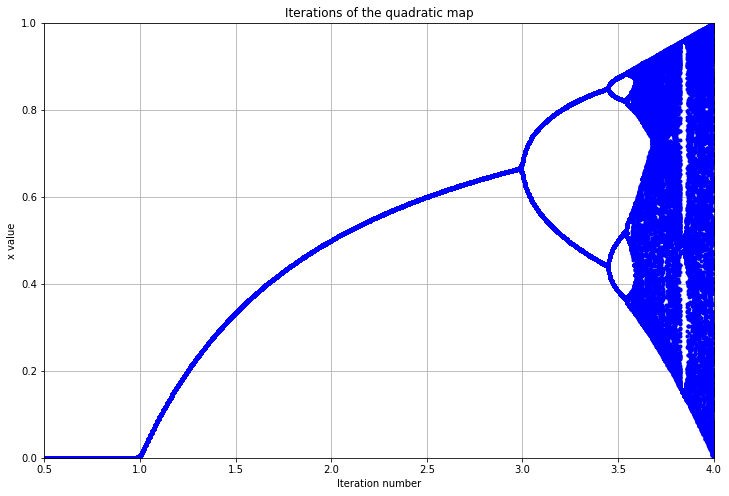

In [3]:
m = 1024
n_ss = 128
n_transient = 200
x0 = 0.5

xmin = 0.
xmax = 1.0
rmin = 0.5
rmax = 4.0
# Create the m equally spaced values of beta using linspace
r = np.linspace(rmin,rmax,m)

#create a 2D numpy array (init to zero) to store n_ss values at each of the m r values.
x = np.zeros([m,n_ss])

for j in range(r.shape[0]):
    tmp = steadyArray(logistic, x0, r[j], n_transient, n_ss)
    for i in range(n_ss):
        x[j,i] = tmp[i]

# This line sets the size of your plot (width, height in inches)
plt.figure(figsize=(12,8))
"""
Modify the size of the plot and the range of x and r 
to make it easier to read off bifurcation values.
"""

for j in range(n_ss):
    plt.plot(r,x.transpose()[j], 'b.')
plt.axis([rmin,rmax, xmin, xmax])
plt.xlabel('Iteration number')
plt.ylabel('x value')
plt.title('Iterations of the quadratic map')
# plt.xscale("log")
#plt.text(.1, .5, r'$x_0=0.5, r=0.1$')
plt.grid()

plt.show()

In [4]:
""""# YOUR CODE HERE
m = 1024
n_ss = 128
n_transient = 200
x0 = 0.5

#xmin = 0.8275
#xmax = 0.8355
xmin = 0.82
xmax = 0.84
rmin = 3.56882
rmax = 3.6
# Create the m equally spaced values of beta using linspace
r = np.linspace(rmin,rmax,m)

#create a 2D numpy array (init to zero) to store n_ss values at each of the m r values.
x = np.zeros([m,n_ss])

for j in range(r.shape[0]):
    tmp = steadyArray(logistic, x0, r[j], n_transient, n_ss)
    for i in range(n_ss):
        x[j,i] = tmp[i]

# This line sets the size of your plot (width, height in inches)
plt.figure(figsize=(12,8))
"""
#Modify the size of the plot and the range of x and r 
#to make it easier to read off bifurcation values.
"""

for j in range(n_ss):
    plt.plot(r,x.transpose()[j], 'b.')
plt.axis([rmin,rmax, xmin, xmax])
plt.xlabel('Iteration number')
plt.ylabel('x value')
plt.title('Iterations of the quadratic map')
# plt.xscale("log")
#plt.text(.1, .5, r'$x_0=0.5, r=0.1$')
plt.grid()

plt.show()"""""

#The bifurcations from the graph
#r[0]=2.98535
#r[1]=3.44741
#r[2]=3.54295 
#r[3]=3.56376 
#r[4]=3.56882

k = 4
r = [2.98535, 3.44741, 3.54295, 3.56376, 3.56882]
bif_rat = (r[k-1]-r[k-2])/(r[k]-r[k-1])
print(bif_rat)

4.1126482213436395


In [5]:
assert_approx_equal(r[0], 3.0, significant = 2)
assert_approx_equal(r[1], 3.45, significant = 2)

2. Again starting with code from "python_logistic_map.ipynb", your mission for this problem is to perform similar computations on a different map. 

a) Define a mapping function `squared`: $x \rightarrow x^2 + r$.

In [6]:
# YOUR CODE HERE
def squared(x, r):
    return x**2 + r

In [7]:
assert_(squared(1.,0.) == 1.)
assert_(squared(0.5,1.) == 1.25)

2b) Execute code to produce the bifurcation diagram for the `squared` map. Again determine  parameter values for the first 5 bifurcation points, store them in a numpy array `r` and compute the new value of the ratio `bif_rat`. Note that the bifurcations now occur as `r` becomes more negative, and you should focus on the parameter range `-2 < r < 0.5`.

In [8]:
''''# YOUR CODE HERE
m = 1024
n_ss = 128
n_transient = 200
x0 = 0.5

#xmin = 0.4
#xmax = 0.6
#rmin = -1.4
#rmax = -1.3924
xmin = 0.4
xmax = 0.6
rmin = -1.4
rmax = -1.39977

# Create the m equally spaced values of beta using linspace
r = np.linspace(rmin,rmax,m)

#create a 2D numpy array (init to zero) to store n_ss values at each of the m r values.
x = np.zeros([m,n_ss])

for j in range(r.shape[0]):
    tmp = steadyArray(squared, x0, r[j], n_transient, n_ss)
    for i in range(n_ss):
        x[j,i] = tmp[i]

# This line sets the size of your plot (width, height in inches)
plt.figure(figsize=(12,8))
"""
Modify the size of the plot and the range of x and r 
to make it easier to read off bifurcation values.
"""

for j in range(n_ss):
    plt.plot(r,x.transpose()[j], 'b.')
plt.axis([rmin,rmax, xmin, xmax])
plt.xlabel('Iteration number')
plt.ylabel('x value')
plt.title('Iterations of the quadratic map')
# plt.xscale("log")
#plt.text(.1, .5, r'$x_0=0.5, r=0.1$')
plt.grid()

plt.show()'''


#The bifurcations from the graph
#r[0]= -0.74205
#r[1]= -1.2435
#r[2]= -1.3668
#r[3]= -1.3934
#r[4]= -1.39979
r = [-0.74205, -1.2435, -1.3668, -1.3934, -1.39979]
k = 4
bif_rat = (r[k-1]-r[k-2])/(r[k]-r[k-1])
print(bif_rat)

4.16275430359929


In [9]:
assert_approx_equal(r[0], -0.74, significant = 2)
assert_approx_equal(r[1], -1.24, significant = 2)

You may find it surprising that the `bif_rat` values are similar. However, it turns out that the limiting value is _universal_ in the sense that, for a wide class of mapping functions, the value of `bif_rat` is independent of the details of the function.

> This fact was discovered by the late physicist Mitchell Feigenbaum at Los Alamos National Lab in 1975 _using an HP-65 calculator_! He later proved the result using some fairly sophisticated math and went on to receive a MacArthur Fellowship and the Wolf Prize  (and found a successful company that provides software to efficient computation of the value of financial derivatives).You have more powerful computing tools a your disposal, so perhaps you will also go on to engage in meaningful computational discovery...

With your computational exploration tools at hand, feel free to try it for some other maps such as $x \rightarrow sin(x) + r$, but note that you will need to import `sin()` from the math library (or use `np.sin()` which also works for array inputs).

Admittedly it is a bit hard to get good values from the kind of plots we just made, but we will try another version in Problem 3.

3a. Adapt your mapping function to work with complex inputs, e.g. $x,r \rightarrow z,c$. To learn about the syntax for complex numbers in python, put your web search skills to work. Note that the term $x*x$ in the real version aims to compute the square of the magnitude, and the squared magnitude of the complex number $z$ is obtained by multiplying not by itself, but by its conjugate. Again, but your search skills to work to find the syntax for computing the complex conjugate in python.

In [10]:
# YOUR CODE HERE
def f(z, c):
    return z*z+c

In [11]:
assert_(f(3.+4.j, -15.+3.j) == -22.+27.j )

3a. Pursue the same idea of iterating the mapping (i.e. plugging the output back in as the input repeatedly). Create a numpy array `vals` and write a loop to store the first `n` iterates in `vals` for `n=10` and `c = -.25+.25j`.

In [12]:
# YOUR CODE HERE
#BASED ON THE LOGISTIC MAP SLIDES/LOGISTIC ARRAY CODE

n = 10
c = -.25+.25j
vals = np.zeros(n, dtype=np.complex) 
z0 = 0
z_old = z0 #assign the initial value
for i in range(n): #iterate over the desired sequence
    vals[i] = z_old
    z_new = f(z_old, c) #compute the output value and assign to variable z_new
    z_old = z_new #assign the new (output) value top be the old (input) value for the next iterate
print(vals)

[ 0.        +0.j         -0.25      +0.25j       -0.25      +0.125j
 -0.203125  +0.1875j     -0.24389648+0.17382812j -0.22073072+0.16520786j
 -0.22857159+0.1770671j  -0.22910779+0.16905498j -0.22608921+0.17253637j
 -0.22865247+0.17198278j]


In [13]:
assert_(vals[2] == -0.25 + 0.125j)

3b. Repeat 3a, but change the parameter values to `c = -1.+1.j`.

In [14]:
# YOUR CODE HERE
n = 10
c = -1.+1.j
vals = np.zeros(n, dtype=np.complex) 
z0 = 0
z_old = z0 #assign the initial value
for i in range(n): #iterate over the desired sequence
    vals[i] = z_old
    z_new = f(z_old, c) #compute the output value and assign to variable z_new
    z_old = z_new #assign the new (output) value top be the old (input) value for the next iterate
print(vals)

[ 0.00000000e+00+0.00000000e+00j -1.00000000e+00+1.00000000e+00j
 -1.00000000e+00-1.00000000e+00j -1.00000000e+00+3.00000000e+00j
 -9.00000000e+00-5.00000000e+00j  5.50000000e+01+9.10000000e+01j
 -5.25700000e+03+1.00110000e+04j -7.25840730e+07-1.05255653e+08j
 -5.81030484e+15+1.52797680e+16j -1.99711668e+32-1.77560220e+32j]


In [15]:
assert_(vals[3] == -1. + 3.j)

3c. Hopefully you learned from parts 3a. and 3b. that some parameter values lead to "escape" (i.e., the iterates grow large and esacpe from a disk of a fixed size centered at the origin), and some parameter values lead to "capture" (i.e., the iterates do not grow in size and remain with a disk of fixed radius centered at the origin). We want to explore how that behavior depends on the parameter value.

As a first step, write a function `escape_iters()` that takes as arguments the function name, a complex parameter value, a real radius, and a maximum number of iterations to compute; and returns the "escape iteration number" (i.e. the integer number of iterations computed, starting at the origin, before the magnitude exceeds the specified radius).

In [16]:
# Fill in your code to implement escape_iters
def escape_iters(f, c, rad, max_iters):
    """
    Compute the number of iterations before escape from a disk at the origin.
    
    Arguments:
        f: name of mapping function
        c: complex float parameter value
        rad: float radius
        max_iters: int number of iterations without escape
        
    Returns:
        iter_count: int number of iterations
    """
    # YOUR CODE HERE
    import math
    z0 = 0
    z_old = z0
    for i in range(max_iters):
        z_new = f(z_old, c)
        z_old = z_new
        i += 1
        if  (math.sqrt(z_old.real**2 + z_old.imag**2) > rad):
            break
    return i

In [17]:
rad = 3
max_iters = 10
c = .25+.25j
assert_(escape_iters(f, c, rad, max_iters) == max_iters)

c = -1. + 1.j
assert_(escape_iters(f, c, rad, max_iters) == 3)

3d. Write code including, a doubly nested loop, to compute the escape iteration number for parameter values on a regular grid in the complex paramter plane covering the range $-2.5<Re(c)<0.5, -1<Im(c)<1$. Store the escape iteration values in a 2D numpy array named `escape_count`.

When developing your code, it is generally a good idea to start off aiming for a small result (that you can inspect easily) and then crank up the input parameter values to get more extensive results after you have confidence that things are working okay.

In this case start with 6 values of $r = Re(c)$ evenly distributed on $[-2,0.5]$ and 5 values of $s = Im(c)$ evenly distributed across $[0,2]$.

In [18]:
# insert you code here to compute the (small) escape_count array

# YOUR CODE HERE
Re = np.linspace(-2, 0.5, 6)
Im = np.linspace(0, 2, 5)
escape_count = np.zeros((5, 6))
max_iters = 10
rad = 3
# NESTED LOOP
for s in range(len(Im)):
    for r in range(len(Re)):
            c = Re[r] + Im[s] *1.j
            escape_count[s][r] = escape_iters(f, c, rad, max_iters)
print(escape_count)

[[10. 10. 10. 10. 10.  5.]
 [ 3.  4.  6. 10. 10.  5.]
 [ 2.  3.  3.  4. 10.  3.]
 [ 2.  2.  3.  3.  3.  2.]
 [ 2.  2.  2.  2.  2.  2.]]


In [19]:
assert_allclose(
    escape_count, 
    np.array([[10, 10, 10, 10, 10,  5],
     [ 3,  4,  6, 10, 10,  5],
     [ 2,  3,  3,  4, 10,  3],
     [ 2,  2,  3,  3,  3,  2],
     [ 2,  2,  2,  2,  2,  2]])
)

3e. Convert your code from 3d into a function named `mandy` as specified by the docstring below:

In [20]:
# insert you code to implement the mandy function
def mandy(f, r_spec, s_spec, rad, max_iters):
    """
    Compute the escape counts for a complex-valued iterated map
    
    Arguments:
        f: name of the mapping function
        r_spec: 3-tuple with floatvalues for min and max and int value for number of points along real axis
        s_spec: 3-tuple with floatvalues for min and max and int value for number of points along imag axis
        rad: real radius of capture disk
        max_iters: int maximum number of iterations to compute
    """
    # YOUR CODE HERE
    rmin, rmax, rint = r_spec
    smin, smax, sint = s_spec
    Re = np.linspace(rmin, rmax, rint)
    Im = np.linspace(smin, smax, sint)
    # NESTED LOOP
    escape_count = np.zeros((sint, rint))
    for s in range(len(Im)):
        for r in range(len(Re)):
            c = Re[r] + Im[s] *1.j
            escape_count[s][r] = escape_iters(f, c, rad, max_iters)
    return escape_count
print(escape_count)

[[10. 10. 10. 10. 10.  5.]
 [ 3.  4.  6. 10. 10.  5.]
 [ 2.  3.  3.  4. 10.  3.]
 [ 2.  2.  3.  3.  3.  2.]
 [ 2.  2.  2.  2.  2.  2.]]


In [21]:
r_spec = -2., .5, 6
s_spec = 0., 2., 5
rad = 3.
max_iters = 10
escape_count = mandy(f, r_spec, s_spec, rad, max_iters)
expected = np.array([[10, 10, 10, 10, 10,  5],
       [ 3,  4,  6, 10, 10,  5],
       [ 2,  3,  3,  4, 10,  3],
       [ 2,  2,  3,  3,  3,  2],
       [ 2,  2,  2,  2,  2,  2]])
assert_allclose(escape_count, expected)

3f. Now "go big" with `n_re = 256` points across $-2.5 < r < 1.$ and `n_im = 256` points across $-1.25 < s < 1.25$, and save your results in an array named `escape_count256`.

In [22]:
# YOUR CODE HERE
n_re = 256
n_im = 256
Re = -2.5, 1, n_re
Im = -1.25, 1.25, n_im
rad = 3
max_iters = 1000
escape_count256 = mandy(f, Re, Im, rad, max_iters)

Visualize the "captured" region using the code below:

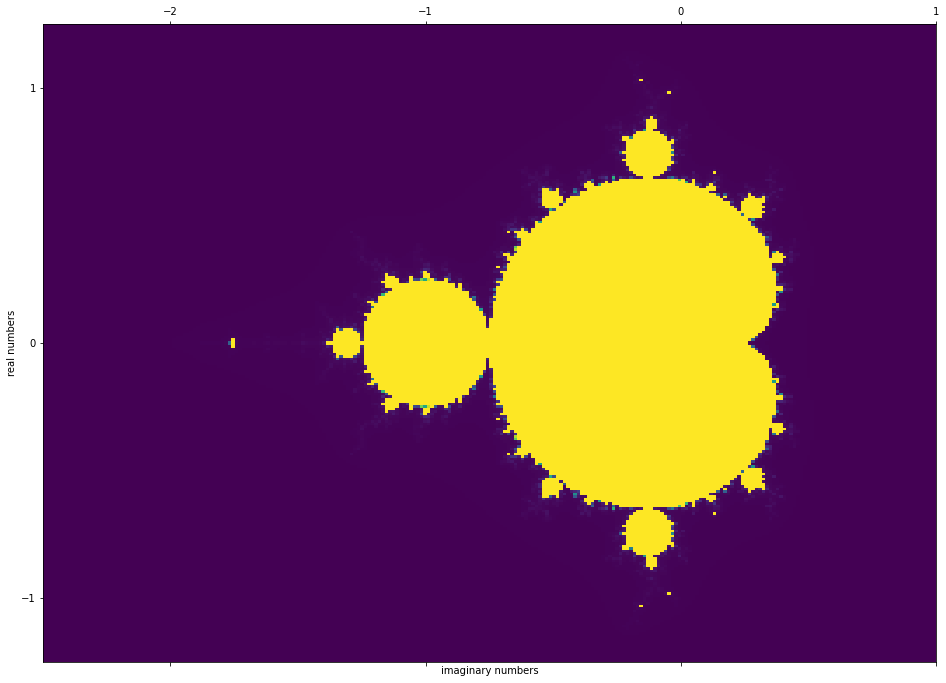

In [33]:
# YOUR CODE HERE
plt.matshow(escape_count256, extent = [-2.5, 1, -1.25, 1.25])
plt.xlabel('imaginary numbers')
plt.ylabel('real numbers')
plt.rcParams["figure.figsize"] = (100,100)
plt.show()

Your captured region should consist of a big blob around the origin, with a smaller "circular" blob to its left, a still smaller "circular" blob to the left of that, ... (The function you wrote is named `mandy()` because the image you have computed is, in fact, a depiction of the famous Mandelbrot set which is named after Benoit Mandelbrot, the late, great mathematician and self-described "fractalist".)

Look along the negative real axis to identify the points where the blobs meet. What are the values of `r`? Do they look familiar?

In fact, these points should match up exactly with the bifurcation values you found in Problem 2b.

As you did earlier, set the relevant parameter values and re-compute to "zoom in" and read off good estimates of the"blob junction values" along the real axis, and use them to estimate (as best you can) the value of the Feigenbaum universal scaling constant (a.k.a `bif_rat`).

3g. Create a numpy array `junction` that stores the real junction values you read from your plots, and assign to `bif_rat` your improved estimate of the universal scaling constant.

In [39]:
# create the `junction` array and assign your value to bif_rat
# YOUR CODE HERE
''''plt.matshow(escape_count256, extent = [-2.5, 1, -1.25, 1.25])
plt.rcParams["figure.figsize"] = (100,100)
plt.xlabel('imaginary numbers')
plt.ylabel('real numbers')
plt.xlim(-1.42,-1.38)
plt.ylim(-.02, .02)
plt.show()'''


#j[0]= -0.75
#j[1]= -1.2435
#j[2]= -1.3646
#j[3]= -1.3925
#j[4]= -1.3993
#k = 3
junction  = [-0.75 ,-1.2435 ,-1.3646,-1.3925,-1.3993]
k = 4
bif_rat = (junction[k-1]-junction[k-2])/(junction[k]-junction[k-1])
print(bif_rat)  



4.102941176470644
